<a href="https://colab.research.google.com/github/wanruu/CS5487/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix

import matplotlib.pyplot as plt
import tqdm

In [9]:
vecs=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_vec.txt')
labels=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_labels.txt')
train_data=vecs[:2000]
test_data=vecs[2000:]
train_label=labels[:2000]
test_label=labels[2000:]

In [5]:
kmeans = KMeans(n_clusters=10) #10clusters
kmeans.fit(train_data)

centers = kmeans.cluster_centers_
for j in range(10):
    index = train_label == j
    p = kmeans.predict(train_data[index, :])
    t = np.argmax(np.bincount(p))  
    kmeans.cluster_centers_[j] = centers[t]  # match the label
y_train_pre = kmeans.predict(train_data)

print('the accuracy of train is', sum(y_train_pre == train_label) / train_label.shape[0])
y_test_pre = kmeans.predict(test_data)
print('the accuracy of test is', sum(y_test_pre == test_label) / test_label.shape[0])

the accuracy of train is 0.5945
the accuracy of test is 0.5925


In [8]:
#trail 2
train_data=vecs[2000:]
test_data=vecs[:2000]
train_label=labels[2000:]
test_label=labels[:2000]

kmeans = KMeans(n_clusters=10) #10clusters
kmeans.fit(train_data)

centers = kmeans.cluster_centers_
for j in range(10):
    index = train_label == j
    p = kmeans.predict(train_data[index, :])
    t = np.argmax(np.bincount(p))  
    kmeans.cluster_centers_[j] = centers[t]  # match the label
y_train_pre = kmeans.predict(train_data)

print('the accuracy of train is', sum(y_train_pre == train_label) / train_label.shape[0])
y_test_pre = kmeans.predict(test_data)
print('the accuracy of test is', sum(y_test_pre == test_label) / test_label.shape[0])

the accuracy of train is 0.4625
the accuracy of test is 0.4575


100%|██████████| 784/784 [35:00<00:00,  2.68s/it]


[27, 0.535, 0.539]


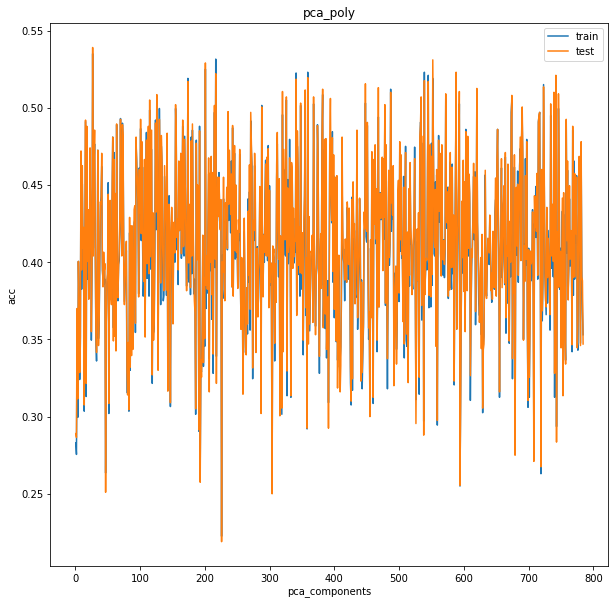

In [6]:
#pca_kmeans
pca_components=[]
pca_train_acc=[]
pca_test_acc=[]
for i in tqdm.tqdm(range(784)):
  #pca with i+1 eigenvalues

  pca_train_label=labels[:2000]
  pca_test_label=labels[2000:]
  
  pca_component=i+1
  pca = PCA(n_components=pca_component)
  pca_train_data = pca.fit_transform(train_data)
  pca_test_data = pca.transform(test_data)
  #shuffle
  # pca_train_data, pca_train_label = shuffle(pca_train_data, pca_train_label, random_state=123)
  # pca_test_data, pca_test_label = shuffle(pca_test_data, pca_test_label, random_state=123)

  kmeans = KMeans(n_clusters=10) #10clusters
  kmeans.fit(pca_train_data)

  centers = kmeans.cluster_centers_
  for j in range(10):
      index = pca_train_label == j
      p = kmeans.predict(pca_train_data[index, :])
      t = np.argmax(np.bincount(p))  
      kmeans.cluster_centers_[j] = centers[t]  # match the label
  y_train_pre = kmeans.predict(pca_train_data)

  #print('the accuracy of train is', sum(y_train_pre == train_label) / train_label.shape[0])
  y_test_pre = kmeans.predict(pca_test_data)
  #print('the accuracy of test is', sum(y_test_pre == test_label) / test_label.shape[0])

  pca_components.append(pca_component)
  pca_train_acc.append(sum(y_train_pre == pca_train_label) / pca_train_label.shape[0])
  pca_test_acc.append(sum(y_test_pre == pca_test_label) / pca_test_label.shape[0])

plt.figure(figsize=(10, 10))
plt.plot(pca_components,pca_train_acc,label='train')
plt.plot(pca_components,pca_test_acc,label='test')
plt.xlabel('pca_components')
plt.ylabel('acc')
plt.title('pca_poly')
plt.legend()
plt.show

#best pca
idx=pca_test_acc.index(max(pca_test_acc))
print([pca_components[idx],pca_train_acc[idx],max(pca_test_acc)])

In [37]:
#trail 2
train_data=vecs[2000:]
test_data=vecs[:2000]
train_label=labels[2000:]
test_label=labels[:2000]


pca_train_label=labels[:2000]
pca_test_label=labels[2000:]
  
pca_component=27
pca = PCA(n_components=pca_component)
pca_train_data = pca.fit_transform(train_data)
pca_test_data = pca.transform(test_data)
  #shuffle
  # pca_train_data, pca_train_label = shuffle(pca_train_data, pca_train_label, random_state=123)
  # pca_test_data, pca_test_label = shuffle(pca_test_data, pca_test_label, random_state=123)

kmeans = KMeans(n_clusters=10) #10clusters
kmeans.fit(pca_train_data)

centers = kmeans.cluster_centers_
for j in range(10):
    index = pca_train_label == j
    p = kmeans.predict(pca_train_data[index, :])
    t = np.argmax(np.bincount(p))  
    kmeans.cluster_centers_[j] = centers[t]  # match the label
y_train_pre = kmeans.predict(pca_train_data)

print('the accuracy of train is', sum(y_train_pre == train_label) / train_label.shape[0])
y_test_pre = kmeans.predict(pca_test_data)
print('the accuracy of test is', sum(y_test_pre == test_label) / test_label.shape[0])




the accuracy of train is 0.4855
the accuracy of test is 0.474
